<a href="https://colab.research.google.com/github/edusigarini/ImersaoDados4/blob/main/Imersao_dados_4_Desafio2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Desafios Aula 02

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
imoveis = pd.read_csv(url)

#importando as bibliotecas do pandas, seaborn, matplotlib

In [25]:
imoveis.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [26]:
imoveis["Valor"].str.split(expand = True)
#separar as strings da coluna Valor

,0,1,2
0,R$,7.000.000,None
1,R$,3.700.000,None
2,R$,380.000,None
3,R$,685.000,None
4,R$,540.000,None
...,...,...,...
10003,R$,665.000,None
10004,R$,2.300.000,None
10005,R$,1.050.000,None
10006,R$,2.200,/Mês


In [27]:
imoveis[["Moeda", "Valor Anuncio", "Tipo Anuncio"]] = imoveis["Valor"].str.split(expand = True)
imoveis.head()
#adicionando novas colunas no DF

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor Anuncio,Tipo Anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None


In [28]:
imoveis["Tipo Anuncio"].isnull()
#filtrar os tipos de anuncio

0         True
1         True
2         True
3         True
4         True
         ...  
10003     True
10004     True
10005     True
10006    False
10007     True
Name: Tipo Anuncio, Length: 10008, dtype: bool

In [29]:
imoveis[imoveis["Tipo Anuncio"].isnull()]["Tipo Anuncio"].unique()

array([None], dtype=object)

In [30]:
imoveis_venda = imoveis[imoveis["Tipo Anuncio"].isnull()]
imoveis_venda
#criando um novo DF, somente com imoveis a venda

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor Anuncio,Tipo Anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None
...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None


In [31]:
imoveis_venda["Valor Anuncio"] = imoveis_venda["Valor Anuncio"].str.replace(".","").astype(float)
#convertendo a string do valor anuncio para tipo float

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
pd.set_option("display.precision", 2) # definir duas casas decimais de precisão
pd.set_option('display.float_format', lambda x: '%.2f' % x)
imoveis_venda.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor Anuncio,Valor em milhões
count,9156.00,9156.00,9156.00,9156.00,9156.00,9156.00
mean,434.42,3.45,3.80,3.96,3052202.96,3.05
std,7856.42,1.05,1.97,2.60,3944208.19,3.94
min,10.00,1.00,1.00,1.00,13000.00,0.01
25%,168.00,3.00,2.00,2.00,890000.00,0.89
50%,276.00,3.00,4.00,4.00,1800000.00,1.80
75%,450.00,4.00,5.00,5.00,3500000.00,3.50
max,750000.00,16.00,40.00,50.00,65000000.00,65.00


In [37]:
imoveis_venda.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor Anuncio,Tipo Anuncio,Valor em milhões
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7000000.00,None,7.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3700000.00,None,3.70
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380000.00,None,0.38
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685000.00,None,0.69
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540000.00,None,0.54


1 - Criar uma escala de valores em milhões.

In [38]:
imoveis_venda["Valor em milhões"] = imoveis_venda["Valor Anuncio"] / 1000000
imoveis_venda.describe().round(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Metragem,Quartos,Banheiros,Vagas,Valor Anuncio,Valor em milhões
count,9156.00,9156.00,9156.00,9156.00,9156.00,9156.00
mean,434.42,3.45,3.80,3.96,3052202.96,3.05
std,7856.42,1.05,1.97,2.60,3944208.19,3.94
min,10.00,1.00,1.00,1.00,13000.00,0.01
25%,168.00,3.00,2.00,2.00,890000.00,0.89
50%,276.00,3.00,4.00,4.00,1800000.00,1.80
75%,450.00,4.00,5.00,5.00,3500000.00,3.50
max,750000.00,16.00,40.00,50.00,65000000.00,65.00


2 - Deixar o gráfico do histograma de valores legível (alterar labels, cores, título, escala).

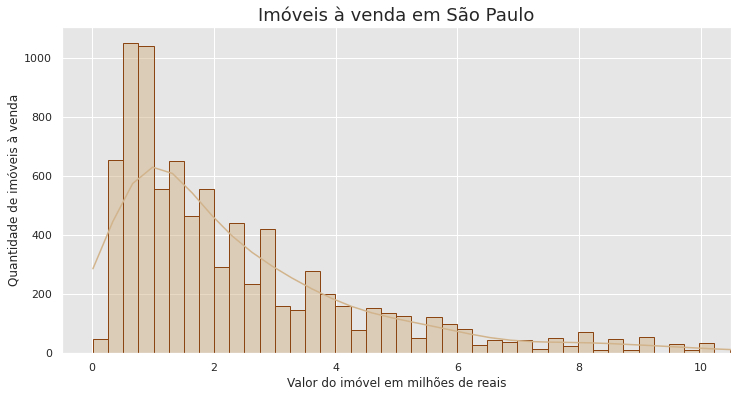

In [41]:
sns.set()
sns.set_style('darkgrid', {'axes.facecolor': '0.9'} )
plt.figure(figsize=(12, 6))
ax = sns.histplot(
    data = imoveis_venda, 
    x = 'Valor em milhões',
    kde = True, 
    bins = 'auto', 
    lw = 1, 
    edgecolor = '#8B4513',
    color = '#D2B48C'
)

ax.set_title('Imóveis à venda em São Paulo', size=18)
ax.set(xlabel='Valor do imóvel em milhões de reais', ylabel='Quantidade de imóveis à venda')

plt.xlim((-0.5, 10.5))
plt.show()

3 - Preço do metro quadrado por bairro e plotar em um gráfico ideal.

In [44]:
metro_quadrado = imoveis_venda["Valor Anuncio"] / imoveis_venda["Metragem"]
imoveis_venda["Valor metro quadrado"] = metro_quadrado
imoveis_venda

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor Anuncio,Tipo Anuncio,Valor em milhões,Valor metro quadrado
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7000000.00,None,7.00,7000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3700000.00,None,3.70,7459.68
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380000.00,None,0.38,3040.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685000.00,None,0.69,2209.68
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540000.00,None,0.54,5400.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1500000.00,None,1.50,5617.98
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665000.00,None,0.67,7000.00
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2300000.00,None,2.30,3801.65
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1050000.00,None,1.05,5121.95


In [45]:
imoveis_venda.groupby("Bairro")["Valor metro quadrado"].describe()

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Aclimação,79.00,7656.17,3087.22,3333.33,6000.00,7272.73,8528.14,20000.00
Alto da Boa Vista,8.00,5849.57,1251.64,4352.33,4875.26,5831.93,6711.05,7460.32
Alto da Lapa,80.00,7606.73,2897.23,2123.89,5928.24,7402.60,8857.14,20543.48
Alto da Mooca,20.00,5691.74,2025.24,1987.58,4912.28,5801.28,6728.94,9090.91
Alto de Pinheiros,369.00,11269.98,3939.97,3495.44,8625.00,10703.12,13245.03,25714.29
...,...,...,...,...,...,...,...,...
Vila Água Funda,5.00,4467.13,1532.07,2700.00,3421.05,4111.11,5944.06,6159.42
Água Branca,12.00,7269.11,1671.02,5902.44,6249.57,6584.81,7961.09,11818.18
Água Fria,12.00,5841.10,1278.07,3805.73,4903.12,6076.92,6733.48,7588.24


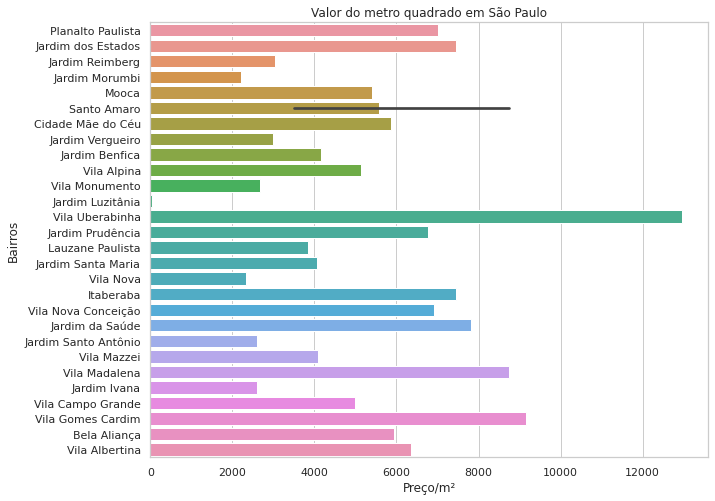

In [46]:
sns.set(style = 'whitegrid')  
plt.figure(figsize=(10,8))
bp = sns.barplot(x="Valor metro quadrado", y="Bairro", data = imoveis_venda.head(30))
bp.set_title("Valor do metro quadrado em São Paulo")
plt.xlabel('Preço/m²')
plt.ylabel('Bairros')
plt.show()

4 - Explorar as bibliotecas de visualizações e colocar as suas conclusão

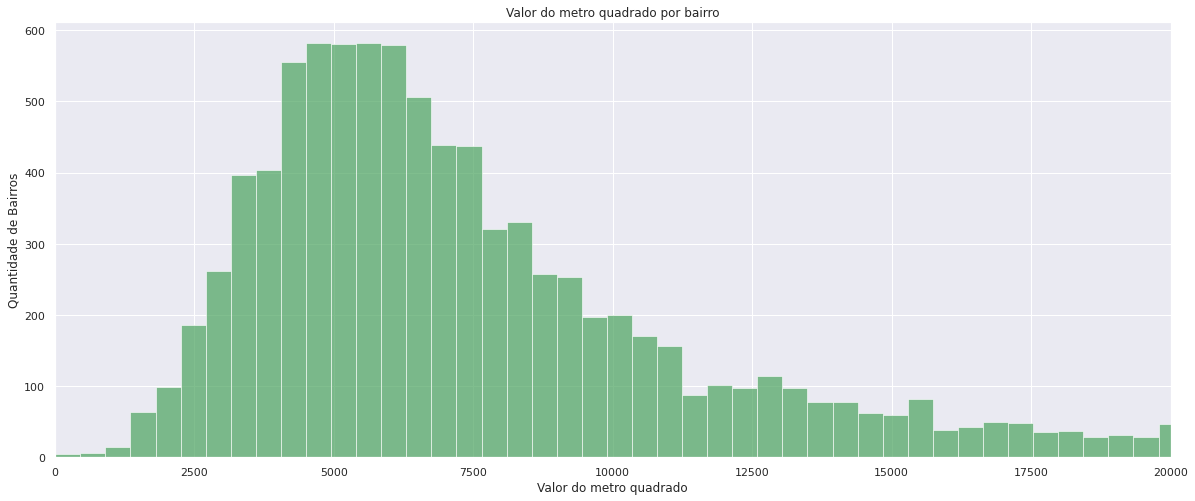

In [55]:
sns.set()
plt.figure(figsize=(20, 8))
ax = sns.histplot(data = imoveis_venda, x = "Valor metro quadrado",color='g')
ax.set_title("Valor do metro quadrado por bairro")
ax.set_ylabel("Quantidade de Bairros")
ax.set_xlabel("Valor do metro quadrado")
plt.xlim((-0.1, 20000))
plt.show()

5 - Pesquisar um visualização para analisar os quartis, mediana e outliers.

In [56]:
import plotly.express as px
import plotly.graph_objects as go

In [57]:
Valor_m2 = imoveis_venda["Valor metro quadrado"]

In [58]:
trace0 = go.Box(y = Valor_m2, name = 'Valor por M²')
layout = go.Layout(title = 'Boxplot dos Valores do M² em R$')

In [60]:
ig = go.Figure(data = trace0, layout = layout)
ig.show()